# Param search

Imports

In [1]:
import logging

from tinkoff.invest.mock_services import MockedClient
from decimal import Decimal
from tinkoff.invest.strategies.moving_average.strategy_settings import MovingAverageStrategySettings
from tinkoff.invest import CandleInterval, MoneyValue
from tinkoff.invest.strategies.moving_average.signal_executor import MovingAverageSignalExecutor
from tinkoff.invest.strategies.moving_average.supervisor import MovingAverageStrategySupervisor
from tinkoff.invest.strategies.moving_average.strategy_state import MovingAverageStrategyState
from tinkoff.invest.strategies.moving_average.strategy import MovingAverageStrategy
from tinkoff.invest.strategies.moving_average.trader import MovingAverageStrategyTrader
from datetime import timedelta, datetime, timezone
from tinkoff.invest.typedefs import ShareId, AccountId
from tinkoff.invest.strategies.base.account_manager import AccountManager
from tinkoff.invest.strategies.moving_average.plotter import MovingAverageStrategyPlotter


logging.basicConfig(format="%(asctime)s %(levelname)s:%(message)s", level=logging.INFO)
logger = logging.getLogger(__name__)

Setup

In [2]:
token = 

Settings

In [3]:
figi = ShareId("BBG004730N88")
account_id = AccountId("1337007228")
settings = MovingAverageStrategySettings(
    share_id=figi,
    account_id=account_id,
    max_transaction_price=Decimal(10000),
    candle_interval=CandleInterval.CANDLE_INTERVAL_1_MIN,
    long_period=timedelta(minutes=100),
    short_period=timedelta(minutes=50),
    std_period=timedelta(minutes=30),
)

Stocks for date

In [4]:
def start_datetime() -> datetime:
    return datetime(year=2022, month=2, day=16, hour=17, tzinfo=timezone.utc)

real_market_data_test_from = start_datetime() - timedelta(days=1)
real_market_data_test_start = start_datetime()
real_market_data_test_end = start_datetime() + timedelta(days=3)

Initial balance

In [5]:
balance = MoneyValue(currency="rub", units=20050, nano=690000000)

Trader

In [6]:
with MockedClient(
    token=token,
    settings=settings,
    real_market_data_test_from=real_market_data_test_from,
    real_market_data_test_start=real_market_data_test_start,
    real_market_data_test_end=real_market_data_test_end,
    balance=balance
) as mocked_services:
    account_manager = AccountManager(services=mocked_services, strategy_settings=settings)
    state = MovingAverageStrategyState()
    strategy = MovingAverageStrategy(
        settings=settings,
        account_manager=account_manager,
        state=state,
    )
    supervisor = MovingAverageStrategySupervisor()
    signal_executor = MovingAverageSignalExecutor(
        services=mocked_services,
        state=state,
        settings=settings,
    )
    moving_average_strategy_trader = MovingAverageStrategyTrader(
        strategy=strategy,
        settings=settings,
        services=mocked_services,
        state=state,
        signal_executor=signal_executor,
        account_manager=account_manager,
        supervisor=supervisor,
    )
    plotter = MovingAverageStrategyPlotter(settings=settings)
    
    initial_balance = account_manager.get_current_balance()

    for i in range(50):
        logger.info("Trade %s", i)
        moving_average_strategy_trader.trade()

2022-02-16 22:00:00,000 INFO:3b07638b1bca7977126705ce740ac7af GetCandles
2022-02-16 22:00:00,000 INFO:c19a002e84b323c556907a850b1f9a22 GetCandles
2022-02-16 22:00:00,000 INFO:e3772538618195cfeb09155428926c30 GetCandles
2022-02-16 22:00:00,000 INFO:6900c6888c4118a869b66b1fb1351b82 GetCandles
2022-02-16 22:00:00,000 INFO:Loading candles for period 2:30:00 from 2022-02-16 17:00:00
2022-02-16 22:00:00,000 INFO:Marginal trade is active
2022-02-16 22:00:00,000 INFO:Got enough data for strategy
2022-02-16 22:00:00,000 INFO:Trade 0
2022-02-16 22:00:00,000 INFO:Balance: 20050.69000000
2022-02-16 22:00:00,000 INFO:Refreshing data
2022-02-16 22:00:00,000 INFO:Data refreshed
2022-02-16 22:00:00,000 INFO:Strategy predict
2022-02-16 22:00:00,000 INFO:Strategy run complete
2022-02-16 22:00:00,000 INFO:Trade 1
2022-02-16 22:00:00,000 INFO:Balance: 20050.69000000
2022-02-16 22:00:00,000 INFO:Refreshing data
2022-02-16 22:01:00,000 INFO:Data refreshed
2022-02-16 22:01:00,000 INFO:Strategy predict
2022-0

2022-02-16 22:35:00,000 INFO:Data refreshed
2022-02-16 22:35:00,000 INFO:Strategy predict
2022-02-16 22:35:00,000 INFO:Balance: 39973.81000000
2022-02-16 22:35:00,000 INFO:Refreshing data
2022-02-16 22:36:00,000 INFO:Data refreshed
2022-02-16 22:36:00,000 INFO:Strategy predict
2022-02-16 22:36:00,000 INFO:Balance: 39973.81000000
2022-02-16 22:36:00,000 INFO:Refreshing data
2022-02-16 22:37:00,000 INFO:Data refreshed
2022-02-16 22:37:00,000 INFO:Strategy predict
2022-02-16 22:37:00,000 INFO:Balance: 39973.81000000
2022-02-16 22:37:00,000 INFO:Refreshing data
2022-02-16 22:38:00,000 INFO:Data refreshed
2022-02-16 22:38:00,000 INFO:Strategy predict
2022-02-16 22:38:00,000 INFO:Balance: 39973.81000000
2022-02-16 22:38:00,000 INFO:Refreshing data
2022-02-16 22:39:00,000 INFO:Data refreshed
2022-02-16 22:39:00,000 INFO:Strategy predict
2022-02-16 22:39:00,000 INFO:Balance: 39973.81000000
2022-02-16 22:39:00,000 INFO:Refreshing data
2022-02-16 22:40:00,000 INFO:Data refreshed
2022-02-16 22:40

2022-02-16 23:18:00,000 INFO:Refreshing data
2022-02-16 23:19:00,000 INFO:Data refreshed
2022-02-16 23:19:00,000 INFO:Strategy predict
2022-02-16 23:19:00,000 INFO:Balance: 39973.81000000
2022-02-16 23:19:00,000 INFO:Refreshing data
2022-02-16 23:20:00,000 INFO:Data refreshed
2022-02-16 23:20:00,000 INFO:Strategy predict
2022-02-16 23:20:00,000 INFO:Balance: 39973.81000000
2022-02-16 23:20:00,000 INFO:Refreshing data
2022-02-16 23:21:00,000 INFO:Data refreshed
2022-02-16 23:21:00,000 INFO:Strategy predict
2022-02-16 23:21:00,000 INFO:Balance: 39973.81000000
2022-02-16 23:21:00,000 INFO:Refreshing data
2022-02-16 23:22:00,000 INFO:Data refreshed
2022-02-16 23:22:00,000 INFO:Strategy predict
2022-02-16 23:22:00,000 INFO:Balance: 39973.81000000
2022-02-16 23:22:00,000 INFO:Refreshing data
2022-02-16 23:23:00,000 INFO:Data refreshed
2022-02-16 23:23:00,000 INFO:Strategy predict
2022-02-16 23:23:00,000 INFO:Balance: 39973.81000000
2022-02-16 23:23:00,000 INFO:Refreshing data
2022-02-16 23:2

2022-02-17 00:00:00,000 INFO:Strategy run complete
2022-02-17 00:00:00,000 INFO:Trade 7
2022-02-17 00:00:00,000 INFO:Balance: 20024.77000000
2022-02-17 00:00:00,000 INFO:Refreshing data
2022-02-17 00:01:00,000 INFO:Data refreshed
2022-02-17 00:01:00,000 INFO:Strategy predict
2022-02-17 00:01:00,000 INFO:Strategy run complete
2022-02-17 00:01:00,000 INFO:Trade 8
2022-02-17 00:01:00,000 INFO:Balance: 20024.77000000
2022-02-17 00:01:00,000 INFO:Refreshing data
2022-02-17 00:02:00,000 INFO:Data refreshed
2022-02-17 00:02:00,000 INFO:Strategy predict
2022-02-17 00:02:00,000 INFO:Strategy run complete
2022-02-17 00:02:00,000 INFO:Trade 9
2022-02-17 00:02:00,000 INFO:Balance: 20024.77000000
2022-02-17 00:02:00,000 INFO:Refreshing data
2022-02-17 00:03:00,000 INFO:Data refreshed
2022-02-17 00:03:00,000 INFO:Strategy predict
2022-02-17 00:03:00,000 INFO:Got signals [OpenLongMarketOrder(lots=72, direction=<SignalDirection.LONG: 'LONG'>)]
2022-02-17 00:03:00,000 INFO:Trying to execute signal Open

2022-02-17 00:41:00,000 INFO:Data refreshed
2022-02-17 00:41:00,000 INFO:Strategy predict
2022-02-17 00:41:00,000 INFO:Balance: 80.77000000
2022-02-17 00:41:00,000 INFO:Refreshing data
2022-02-17 00:42:00,000 INFO:Data refreshed
2022-02-17 00:42:00,000 INFO:Strategy predict
2022-02-17 00:42:00,000 INFO:Balance: 80.77000000
2022-02-17 00:42:00,000 INFO:Refreshing data
2022-02-17 00:43:00,000 INFO:Data refreshed
2022-02-17 00:43:00,000 INFO:Strategy predict
2022-02-17 00:43:00,000 INFO:Balance: 80.77000000
2022-02-17 00:43:00,000 INFO:Refreshing data
2022-02-17 00:44:00,000 INFO:Data refreshed
2022-02-17 00:44:00,000 INFO:Strategy predict
2022-02-17 00:44:00,000 INFO:Balance: 80.77000000
2022-02-17 00:44:00,000 INFO:Refreshing data
2022-02-17 00:45:00,000 INFO:Data refreshed
2022-02-17 00:45:00,000 INFO:Strategy predict
2022-02-17 00:45:00,000 INFO:Balance: 80.77000000
2022-02-17 00:45:00,000 INFO:Refreshing data
2022-02-17 00:46:00,000 INFO:Data refreshed
2022-02-17 00:46:00,000 INFO:St

2022-02-17 01:25:00,000 INFO:Balance: 80.77000000
2022-02-17 01:25:00,000 INFO:Refreshing data
2022-02-17 01:26:00,000 INFO:Data refreshed
2022-02-17 01:26:00,000 INFO:Strategy predict
2022-02-17 01:26:00,000 INFO:Balance: 80.77000000
2022-02-17 01:26:00,000 INFO:Refreshing data
2022-02-17 01:27:00,000 INFO:Data refreshed
2022-02-17 01:27:00,000 INFO:Strategy predict
2022-02-17 01:27:00,000 INFO:Balance: 80.77000000
2022-02-17 01:27:00,000 INFO:Refreshing data
2022-02-17 01:28:00,000 INFO:Data refreshed
2022-02-17 01:28:00,000 INFO:Strategy predict
2022-02-17 01:28:00,000 INFO:Balance: 80.77000000
2022-02-17 01:28:00,000 INFO:Refreshing data
2022-02-17 01:29:00,000 INFO:Data refreshed
2022-02-17 01:29:00,000 INFO:Strategy predict
2022-02-17 01:29:00,000 INFO:Balance: 80.77000000
2022-02-17 01:29:00,000 INFO:Refreshing data
2022-02-17 01:30:00,000 INFO:Data refreshed
2022-02-17 01:30:00,000 INFO:Strategy predict
2022-02-17 01:30:00,000 INFO:Balance: 80.77000000
2022-02-17 01:30:00,000 I

2022-02-17 02:00:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:00:00,000 INFO:Refreshing data
2022-02-17 02:01:00,000 INFO:Data refreshed
2022-02-17 02:01:00,000 INFO:Strategy predict
2022-02-17 02:01:00,000 INFO:Strategy run complete
2022-02-17 02:01:00,000 INFO:Trade 14
2022-02-17 02:01:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:01:00,000 INFO:Refreshing data
2022-02-17 02:02:00,000 INFO:Data refreshed
2022-02-17 02:02:00,000 INFO:Strategy predict
2022-02-17 02:02:00,000 INFO:Strategy run complete
2022-02-17 02:02:00,000 INFO:Trade 15
2022-02-17 02:02:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:02:00,000 INFO:Refreshing data
2022-02-17 02:03:00,000 INFO:Data refreshed
2022-02-17 02:03:00,000 INFO:Strategy predict
2022-02-17 02:03:00,000 INFO:Strategy run complete
2022-02-17 02:03:00,000 INFO:Trade 16
2022-02-17 02:03:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:03:00,000 INFO:Refreshing data
2022-02-17 02:04:00,000 INFO:Data refreshed
2022-02-17 02:04:00,000 INF

2022-02-17 02:30:00,000 INFO:Strategy run complete
2022-02-17 02:30:00,000 INFO:Trade 43
2022-02-17 02:30:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:30:00,000 INFO:Refreshing data
2022-02-17 02:31:00,000 INFO:Data refreshed
2022-02-17 02:31:00,000 INFO:Strategy predict
2022-02-17 02:31:00,000 INFO:Strategy run complete
2022-02-17 02:31:00,000 INFO:Trade 44
2022-02-17 02:31:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:31:00,000 INFO:Refreshing data
2022-02-17 02:32:00,000 INFO:Data refreshed
2022-02-17 02:32:00,000 INFO:Strategy predict
2022-02-17 02:32:00,000 INFO:Strategy run complete
2022-02-17 02:32:00,000 INFO:Trade 45
2022-02-17 02:32:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:32:00,000 INFO:Refreshing data
2022-02-17 02:33:00,000 INFO:Data refreshed
2022-02-17 02:33:00,000 INFO:Strategy predict
2022-02-17 02:33:00,000 INFO:Strategy run complete
2022-02-17 02:33:00,000 INFO:Trade 46
2022-02-17 02:33:00,000 INFO:Balance: 19782.13000000
2022-02-17 02:33:00,000 INF

/Users/irusland/Documents/work/tinkoff/invest-python/.venv/lib/python3.9/site-packages/mplfinance/_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


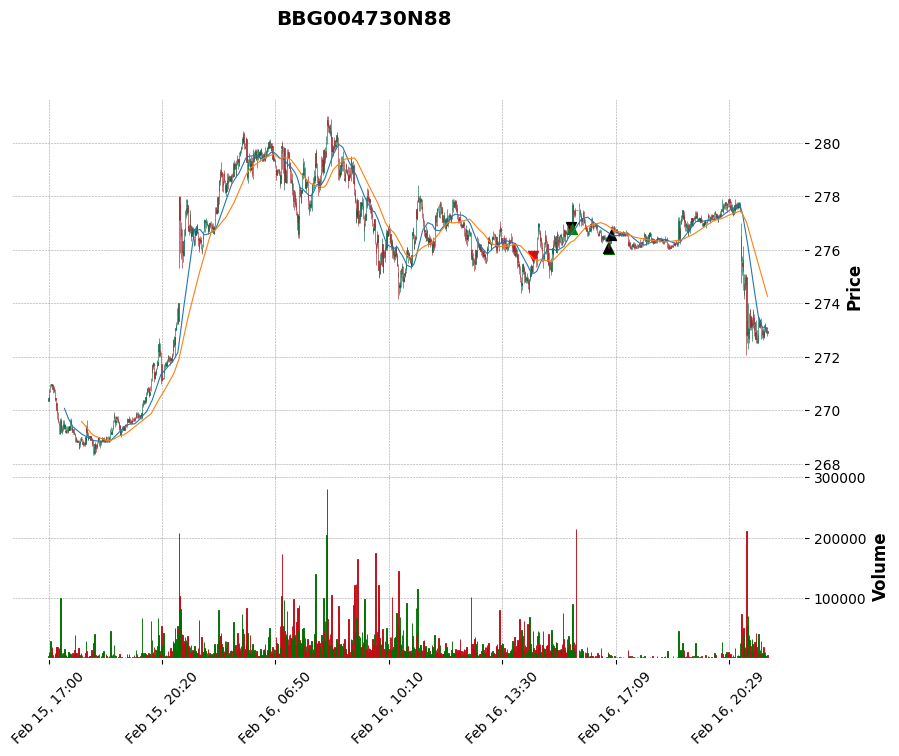

2022-03-04 01:56:30,953 INFO:Initial balance 20050.69000000
2022-03-04 01:56:30,956 INFO:Current balance 19782.13000000


In [7]:
    events = supervisor.get_events()
    plotter.plot(events)

    current_balance = account_manager.get_current_balance()
    assert initial_balance != current_balance
    logger.info("Initial balance %s", initial_balance)
    logger.info("Current balance %s", current_balance)